In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import datetime

df = pd.read_csv('data/London.csv')
df.dtypes

AADFYear                        int64
CP                              int64
Estimation_method              object
Estimation_method_detailed     object
Region                         object
LocalAuthority                 object
Road                           object
RoadCategory                   object
Easting                         int64
Northing                        int64
StartJunction                  object
EndJunction                    object
LinkLength_km                 float64
LinkLength_miles              float64
PedalCycles                     int64
Motorcycles                     int64
CarsTaxis                       int64
BusesCoaches                    int64
LightGoodsVehicles              int64
V2AxleRigidHGV                  int64
V3AxleRigidHGV                  int64
V4or5AxleRigidHGV               int64
V3or4AxleArticHGV               int64
V5AxleArticHGV                  int64
V6orMoreAxleArticHGV            int64
AllHGVs                         int64
AllMotorVehi

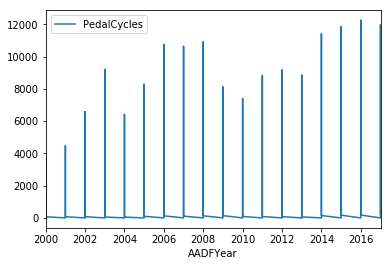

In [2]:
df.plot(x='AADFYear', y='PedalCycles')

In [3]:
df.columns

Index(['AADFYear', 'CP', 'Estimation_method', 'Estimation_method_detailed',
       'Region', 'LocalAuthority', 'Road', 'RoadCategory', 'Easting',
       'Northing', 'StartJunction', 'EndJunction', 'LinkLength_km',
       'LinkLength_miles', 'PedalCycles', 'Motorcycles', 'CarsTaxis',
       'BusesCoaches', 'LightGoodsVehicles', 'V2AxleRigidHGV',
       'V3AxleRigidHGV', 'V4or5AxleRigidHGV', 'V3or4AxleArticHGV',
       'V5AxleArticHGV', 'V6orMoreAxleArticHGV', 'AllHGVs',
       'AllMotorVehicles'],
      dtype='object')

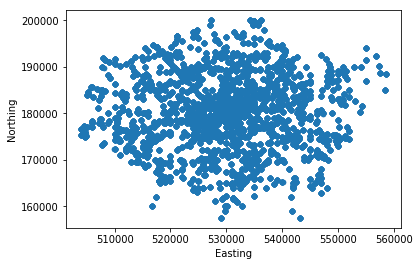

In [4]:
df.plot(x='Easting', y='Northing', kind='scatter')

/Users/samuel/.virtualenvs/redoptima/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


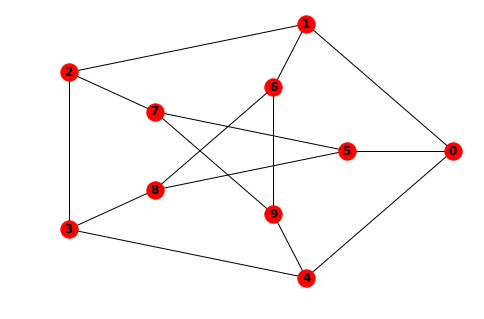

In [5]:
import networkx as nx
# G = nx.Graph()
G = nx.petersen_graph()


nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

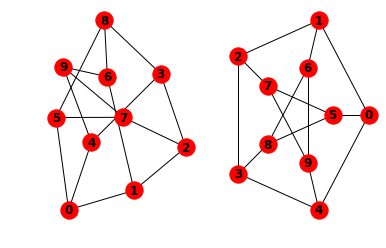

In [6]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [7]:
# G = nx.from_pandas_edgelist(df[[]], source='StartJunction', target='EndJunction')

/Users/samuel/.virtualenvs/redoptima/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


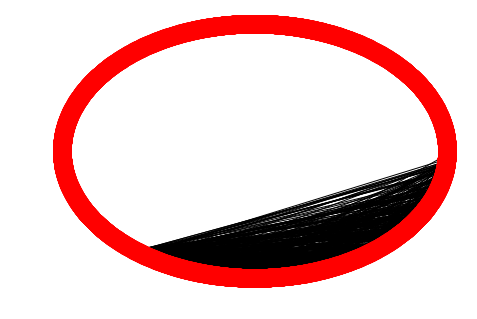

In [70]:
def get_hash(row):
    return hash((row['Easting'],row['Northing']))

df = pd.read_csv('data/London.csv')
df['road_id'] = df.apply(get_hash, axis=1)

G = nx.Graph()


G.add_nodes_from(df['road_id'])
G.add_edges_from(df[['StartJunction','EndJunction']].values)


nx.draw_shell( G )

# df.dtypes
# df[['AADFYear','Easting','Northing','StartJunction','EndJunction']]
# df
# G.add_nodes_from(df[])

In [3]:
df[['Road','StartJunction','EndJunction']].values
print(df[['StartJunction', 'EndJunction']][:10])

      StartJunction                        EndJunction
0              A406                            M1 spur
1                 2                                  4
2                 4                                  3
3               A13                                A11
4  A503 Camden Road  A503 Seven Sisters/Parkhurst Road
5              A406            A598 Regent's Park Road
6  Courtland Avenue                   A411 Barnet Road
7          A3/A2198                          A201/A100
8    A2 Amersham Rd                              A2209
9             A2213                               A102


/Users/samuel/.virtualenvs/redoptima/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


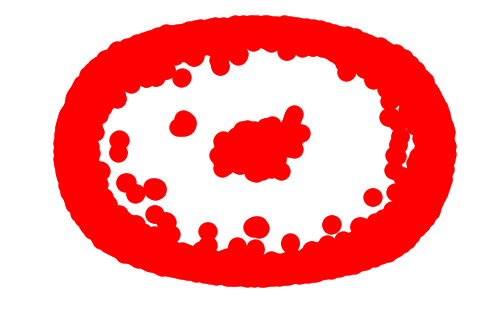

In [14]:
nx.draw( G )

In [134]:
# Make a set of all the junctions; coming from the start junctions and end junctions.
junctions = set(df.EndJunction.values)
junctions = set(df.StartJunction.values)
print(len(junctions))
print(sorted(list(junctions), key=str)[:100])

784
['14', '2', '25', '28', '29', '3', '4', 'A1', 'A1(T)', 'A1/A5203', 'A10', 'A10 Rectory Rd', 'A10 Stoke Newington High St', 'A10(T)', 'A10/A5201', 'A100', 'A100 Tower Bridge rd', 'A100/A1210/A1211', 'A100/A2205', 'A100/A2206', 'A1000', 'A1000 Cherry Tree Hill', 'A1000 High Rd Great North Rd', 'A1000 High Road Great North Rd', 'A1000/A5109', 'A1003', 'A1004', 'A1006', 'A1006/A112 triangle', 'A1008', 'A1009', 'A1009  NEW  ROAD', 'A1009 Chingford Lane', 'A1009 NEW ROAD', 'A101', 'A1010', 'A1011', 'A102', 'A102/A2', 'A1020', 'A103', 'A103 Hornsey Road', 'A103 Hornsey rd', 'A103 Tottenham Lane', 'A1037', 'A1037  Waltham Way', 'A1037 Waltham Way', 'A104', 'A104 Islington Green', 'A104 roundabout', 'A105', 'A105    London  Road', 'A105 London Road', 'A1055', 'A1055   Mollison Ave', 'A1055 Conduit Lane', 'A1055 Mollison Ave', 'A106', 'A106 Ruckholt Rd', 'A106 Victoria Park Rd', 'A1060', "A1069   KING'S ROAD", "A1069 KING'S ROAD", 'A107', 'A107 Lower Clapton Rd', 'A107 Mare St', 'A1080', 'A1

In [177]:
%matplotlib notebook
G = nx.Graph()


# G.add_nodes_from(df['road_id'])
G.add_nodes_from(junctions)
G.add_edges_from(df[['StartJunction','EndJunction']].values, pos=list(df[['Easting', 'Northing']].values))


nx.draw_shell(G)
# Try to draw the graph with positions (Not currently working)
# nx.draw( G, pos=list(df[['Easting', 'Northing']].values) )

# G.add_nodes_from(junctions)
# G.add_edges_from((df['StartJunction'].values, df['EndJunction'].values))

FigureCanvasNbAgg()

/Users/samuel/.virtualenvs/redoptima/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [89]:
G = nx.Graph()

# G.add_nodes_from(df['road_id'])
G.add_nodes_from(junctions, pos=list(df[['Easting', 'Northing']].values)[9:])
G.add_edges_from(df[['StartJunction','EndJunction']].values)


# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    print("n:",n)
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

n: nan


ValueError: too many values to unpack (expected 2)

In [113]:
# G.add_nodes_from(junctions, pos=list(df[['Easting', 'Northing']].values)[9:])
list(df[['Easting', 'Northing']].values)

[522170, 189100]

In [98]:
G = nx.Graph()

# G.add_nodes_from(df['road_id'])
G.add_nodes_from(junctions, pos=list(df[['Easting', 'Northing']].values)[9:])
G.add_edges_from(df[['StartJunction','EndJunction']].values)


# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')
pos = {}
for node in G.nodes():
    pos[node] = [G.node[node]["x"], G.node[node]["y"]]

In [147]:
print(len(pos))
print(G.nodes())

784
['Rd a', 'Rd b', 'Rd c', 'Rd d']


In [184]:
%matplotlib widget
H =  nx.from_pandas_edgelist(df, 'StartJunction', 'EndJunction')

# Graph with Custom nodes:
plt.figure(figsize=(15, 6))
nx.draw(H, with_labels=True, node_size=1, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=1)
plt.show()



FigureCanvasNbAgg()

/Users/samuel/.virtualenvs/redoptima/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [22]:
# Group by example:
line = np.linspace(2*np.pi, 100)
ns = np.cos(line)
es = np.sin(line)
orig_df = pd.DataFrame(
    [ [20, _, _+1, _*_] for _ in range(20) ]+
    [ [21, _, _+1, _*_] for _ in range(15) ]+
    [ [19, _, _+1, _*_] for _ in range(20) ]+
    [ [20, _, _+1, _*_] for _ in range(30,40) ],
    columns=['year', 'Northing', 'Easting', 'All']
)
# group them all by year, split them by year
filt_df = DataFrame()
    

,year,First,Second,All
0,20,0,1,0
1,20,1,2,1
2,20,2,3,4
3,20,3,4,9
4,20,4,5,16
5,20,5,6,25
6,20,6,7,36
7,20,7,8,49
8,20,8,9,64
9,20,9,10,81
